# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

4 11
15

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [ ]:
!python sum.py

32 90
122


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6
23 1 89 56 34 5
4984


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile stresstest1.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

using std::cin;
using std::cout;
using std::vector;

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

long long MaxPairwiseProductLong(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}
int main() {
    for(int w=0;w<20;w++){
        cout << "Prueba " << w+1<< "\n";
        int n= rand()% 19 + 2;
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 5000);                /* no se puede un numero tan grande por la solucion 1 */
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProductLong(a);

        if (res1 != res2) {
            cout << "Incorrecto: " << res1 << " " << res2 << "\n";
            break;
        }
        else {
            cout << "Correcto\n";
        }
    }
    
    
}


Overwriting stresstest1.cpp


In [ ]:
!g++ stresstest1.cpp -o stresstest1
!./stresstest1

Prueba 1
4
886 2777 1915 2793 
Correcto
Prueba 2
10
386 492 1649 1421 2362 27 3690 59 2763 3926 
Correcto
Prueba 3
9
3426 4172 736 211 368 2567 1429 782 1530 
Correcto
Prueba 4
8
123 4067 3135 3929 4802 4022 3058 3069 
Correcto
Prueba 5
7
1393 3456 11 3042 1229 2373 4421 
Correcto
Prueba 6
3
3784 3537 198 
Correcto
Prueba 7
11
3315 4370 1413 3526 1091 3980 4956 1873 1862 4170 1996 
Correcto
Prueba 8
18
2305 925 2084 1327 336 1505 846 1729 1313 857 1124 3895 4582 545 3814 3367 434 364 
Correcto
Prueba 9
2
3750 1087 
Correcto
Prueba 10
15
2276 2178 788 3584 403 2651 2754 2399 4932 60 4676 3368 2739 12 1226 
Correcto
Prueba 11
7
3094 2539 795 570 1434 378 2467 
Correcto
Prueba 12
15
97 2902 3317 492 1652 756 2301 280 4286 4441 3865 4689 3444 1619 3440 
Correcto
Prueba 13
13
3031 3117 3097 771 4481 675 709 3927 4567 2856 4497 2353 4586 
Correcto
Prueba 14
6
306 4683 1219 3624 1528 2871 
Correcto
Prueba 15
17
3829 4503 19 3270 3368 4708 1715 1340 3149 2796 723 2618 2245 2846 3451 2921 3555 

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m9.177s
user	2m8.700s
sys	0m0.033s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Overwriting test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile efficientsolution.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;
long long MaxPairwiseProduct(const std::vector<long long>& numbers) {
    int n = numbers.size();                             //1
    long long maya = max(numbers[0], numbers[1]);       //1
    long long mayb = min(numbers[0], numbers[1]);       //1
    for (int i = 2; i < n; i++) {                       //2n - 1
        if(mayb < numbers[i]){                          //n - 2
            if(maya < numbers[i]){                      //n - 2
                mayb = maya;                            //n - 2
                maya = numbers[i];                      //n - 2
            }else{
                mayb = numbers[i];                      //n - 2
            }
        }
    }

    return maya * mayb;                                 //1
}

int main() {
    int n;                                              //1
    std::cin >> n;                                      //1
    std::vector<long long> numbers(n);                  //n
    for (int i = 0; i < n; ++i) {                       //2n + 1
        std::cin >> numbers[i];                         //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";   //1
    return 0;
}


Writing efficientsolution.cpp


In [ ]:
!g++ efficientsolution.cpp -o efficientsolution

Test with inputs 1 and 2



In [ ]:
!time #%%time
!./efficientsolution < input1.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
90


In [ ]:
!time #%%time
!./efficientsolution < input2.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
40000000000


Test and time it with input 3

In [ ]:
!time #%%time
!./efficientsolution < input3.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
39999800000


20 stress tests

In [ ]:
%%writefile stresstest2.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

using std::cin;
using std::cout;
using std::vector;
using namespace std;

long long MaxPairwiseProduct(const std::vector<long long>& numbers) {
    int n = numbers.size();
    long long maya = max(numbers[0], numbers[1]);
    long long mayb = min(numbers[0], numbers[1]);
    for (int i = 2; i < n; i++) {
        if(mayb < numbers[i]){
            if(maya < numbers[i]){
                mayb = maya;
                maya = numbers[i];
            }else{
                mayb = numbers[i];
            }
        }
    }

    return maya * mayb;
}

long long MaxPairwiseProductLong(const std::vector<long long>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}
int main() {
    for(int w=0;w<20;w++){
        cout << "Prueba " << w+1<< "\n";
        int n= rand()% 19 + 2;
        cout << n << "\n";
        vector <long long int> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 200000);             
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";
        
        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProductLong(a);

        if (res1 != res2) {
            cout << "Incorrecto: " << res1 << " " << res2 << "\n";
            break;
        }
        else {
            cout << "Correcto\n";
        }
    }
    
    
}


Overwriting stresstest2.cpp


In [ ]:
!g++ stresstest2.cpp -o stresstest2
!./stresstest2

Prueba 1
4
130886 92777 36915 147793 
Correcto
Prueba 2
10
85386 160492 116649 41421 2362 90027 168690 120059 97763 113926 
Correcto
Prueba 3
9
183426 89172 55736 5211 195368 102567 156429 65782 21530 
Correcto
Prueba 4
8
65123 174067 103135 113929 179802 34022 123058 133069 
Correcto
Prueba 5
7
161393 18456 175011 78042 176229 177373 84421 
Correcto
Prueba 6
3
13784 98537 175198 
Correcto
Prueba 7
11
198315 64370 166413 3526 176091 68980 159956 41873 6862 199170 106996 
Correcto
Prueba 8
18
102305 20925 77084 136327 60336 126505 150846 21729 61313 125857 16124 153895 19582 100545 98814 33367 115434 190364 
Correcto
Prueba 9
2
113750 171087 
Correcto
Prueba 10
15
117276 147178 95788 193584 105403 102651 192754 12399 199932 95060 149676 193368 147739 10012 36226 
Correcto
Prueba 11
7
148094 97539 140795 80570 51434 160378 97467 
Correcto
Prueba 12
15
110097 12902 173317 170492 126652 60756 197301 160280 124286 9441 153865 29689 28444 146619 158440 
Correcto
Prueba 13
13
158031 108117 13

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_productEfficientSolution_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;
long long MaxPairwiseProduct(const std::vector<long long>& numbers, long long &execints) {
    int n = numbers.size();                             //1
    execints++;
    long long maya = max(numbers[0], numbers[1]);       //1
    execints++;
    long long mayb = min(numbers[0], numbers[1]);       //1
    execints++;
    for (int i = 2; i < n; i++) {                       //2n - 1
        execints += 2;
        if(mayb < numbers[i]){                          //n - 2
            execints++;
            if(maya < numbers[i]){                      //n - 2
                execints++;
                mayb = maya;                            //n - 2
                execints++;
                maya = numbers[i];                      //n - 2
                execints++;
            }else{
                mayb = numbers[i];                      //n - 2
                execints++;
            }
        }
    }
    execints++;

    return maya * mayb;                                 //1
}

int main() {
    long long execints = 0;
    int n;                                              //1
    execints++;
    std::cin >> n;                                      //1
    execints++;
    std::vector<long long> numbers(n);                  //n
    execints += n;
    for (int i = 0; i < n; ++i) {                       //2n + 1
        execints++;
        std::cin >> numbers[i];                         //n
        execints++;
    }
    execints++;

    cout << MaxPairwiseProduct(numbers, execints) << "\n";   //1
    execints++;
    cout<<execints<<endl;
    return 0;
}


Writing max_pairwise_productEfficientSolution_execints.cpp


In [ ]:
!g++ max_pairwise_productEfficientSolution_execints.cpp -o max_pairwise_productEfficientSolution_execints
!./max_pairwise_productEfficientSolution_execints < input1.txt
!./max_pairwise_productEfficientSolution_execints < input2.txt

90
86
40000000000
42


In [ ]:
!./max_pairwise_productEfficientSolution_execints < input3.txt

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#para input1(tiempo en microsegundos)
tiempo_total_i1 = 9.3      #aqui hay que poner el tiempo dado en los test anteriores.
cantidad_de_instrucciones_i1 = 86
tiempo_por_instruccion_i1 = tiempo_total_i1/cantidad_de_instrucciones_i1
instrucciones_por_segundo_i1 = cantidad_de_instrucciones_i1/(tiempo_total_i1/1000000)
print("tiempo por instrucción en microsegundos para input1:", tiempo_por_instruccion_i1)
print("instrucciones por segundo para input1:", instrucciones_por_segundo_i1)

#para input2(tiempo en microsegundos)
tiempo_total_i2 = 9.06
cantidad_de_instrucciones_i2 = 42
tiempo_por_instruccion_i2 = tiempo_total_i2/cantidad_de_instrucciones_i2
instrucciones_por_segundo_i1 = cantidad_de_instrucciones_i2/(tiempo_total_i2/1000000)
print("tiempo por instrucción en microsegundos para input2:", tiempo_por_instruccion_i2)
print("instrucciones por segundo para input2:", cantidad_de_instrucciones_i2)

#para input3(tiempo en microsegundos)
tiempo_total_i3 = 8.82
cantidad_de_instrucciones_i3 = 1799996
tiempo_por_instruccion_i3 = tiempo_total_i3/cantidad_de_instrucciones_i3
instrucciones_por_segundo_i3 = cantidad_de_instrucciones_i3/(tiempo_total_i3/1000000)
print("tiempo por instrucción en microsegundos para input3:", tiempo_por_instruccion_i3)
print("instrucciones por segundo para input3:", cantidad_de_instrucciones_i3)

print("tiempo por instrucción en microsegundos en promedio:", (tiempo_por_instruccion_i1 + tiempo_por_instruccion_i2 + tiempo_por_instruccion_i3)/3)
print("instrucciones por segundo en promedio:", (cantidad_de_instrucciones_i1 + cantidad_de_instrucciones_i2 + cantidad_de_instrucciones_i3)/3)

tiempo por instrucción en microsegundos para input1: 0.10813953488372094
instrucciones por segundo para input1: 9247311.82795699
tiempo por instrucción en microsegundos para input2: 0.21571428571428572
instrucciones por segundo para input2: 42
tiempo por instrucción en microsegundos para input3: 4.9000108889130865e-06
instrucciones por segundo para input3: 1799996
tiempo por instrucción en microsegundos en promedio: 0.10795290686963187
instrucciones por segundo en promedio: 600041.3333333334


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_super_efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;
int main() {
    int n;                              //1
    cin >> n;                           //1
    long long numa = 0;                 //1
    long long numb = 0;                 //1
    long long entrada;                  //1
    for (int i = 0; i < n; i++) {       //2n + 1
        cin >> entrada;                 //n
        if(entrada > numb)              //n
            if(entrada > numa){         //n
                numb = numa;            //n
                numa = entrada;         //n
            }else{
                numb = entrada;         //n
            }
    }
    cout << numa * numb;                //1
    return 0;
}

Overwriting max_pairwise_product_super_efficient.cpp


In [ ]:
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient

Test with inputs 1 and 2


 

In [ ]:
!time #%%time
!./max_pairwise_product_super_efficient < input1.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
90

In [ ]:
!time #%%time
!./max_pairwise_product_super_efficient < input2.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
40000000000

Test and time it with input 3

In [ ]:
!time #%%time
!./max_pairwise_product_super_efficient < input3.txt


real	0m0.000s
user	0m0.000s
sys	0m0.000s
39999800000

20 stress tests 

In [ ]:
%%writefile stresstest3.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

using std::cin;
using std::cout;
using std::vector;
using namespace std;

long long MaxPairwiseProduct(const std::vector<long long>& numbers) {
    int n = numbers.size();
    long long maya = max(numbers[0], numbers[1]);
    long long mayb = min(numbers[0], numbers[1]);
    for (int i = 2; i < n; i++) {
        if(mayb < numbers[i]){
            if(maya < numbers[i]){
                mayb = maya;
                maya = numbers[i];
            }else{
                mayb = numbers[i];
            }
        }
    }

    return maya * mayb;
}

int main() {
    for(int w=0;w<20;w++){
        cout << "Prueba " << w+1<< "\n";
        int n= rand()% 19 + 2;
        cout << n << "\n";
        vector <long long> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 200000);                
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct(a);
        /*long long res2 = MaxPairwiseProductLong(a);*/


        
        
        long long numa = 0;
        long long numb = 0;
        long long entrada;
        for (int i = 0; i < n; i++) {
            /*cin >> entrada;*/
            entrada= a[i];
            if(entrada > numb){
                if(entrada > numa){
                    numb = numa;
                    numa = entrada;
                }else{
                    numb = entrada;
                }
            }
        }
        long long respuesta =numa * numb;





        if (res1 != respuesta) {
            cout << "Incorrecto: " << res1 << " " << respuesta << "\n";
            break;
        }
        else {
            cout << "Correcto\n";
        }
    }
    
    
}


Overwriting stresstest3.cpp


In [ ]:
!g++ stresstest3.cpp -o stresstest3
!./stresstest3

Prueba 1
4
130886 92777 36915 147793 
Correcto
Prueba 2
10
85386 160492 116649 41421 2362 90027 168690 120059 97763 113926 
Correcto
Prueba 3
9
183426 89172 55736 5211 195368 102567 156429 65782 21530 
Correcto
Prueba 4
8
65123 174067 103135 113929 179802 34022 123058 133069 
Correcto
Prueba 5
7
161393 18456 175011 78042 176229 177373 84421 
Correcto
Prueba 6
3
13784 98537 175198 
Correcto
Prueba 7
11
198315 64370 166413 3526 176091 68980 159956 41873 6862 199170 106996 
Correcto
Prueba 8
18
102305 20925 77084 136327 60336 126505 150846 21729 61313 125857 16124 153895 19582 100545 98814 33367 115434 190364 
Correcto
Prueba 9
2
113750 171087 
Correcto
Prueba 10
15
117276 147178 95788 193584 105403 102651 192754 12399 199932 95060 149676 193368 147739 10012 36226 
Correcto
Prueba 11
7
148094 97539 140795 80570 51434 160378 97467 
Correcto
Prueba 12
15
110097 12902 173317 170492 126652 60756 197301 160280 124286 9441 153865 29689 28444 146619 158440 
Correcto
Prueba 13
13
158031 108117 13

Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile SuperefficientSolutionExecint.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;
int main() {
    long long execint = 0LL;
    int n;                              //1
    execint++;
    cin >> n;                           //1
    long long numa = 0;                 //1
    execint++;
    long long numb = 0;                 //1
    execint++;
    long long entrada;                  //1
    execint++;
    for (int i = 0; i < n; i++) {       //2n + 1
        execint += 2;
        cin >> entrada;                 //n
        execint++;
        if(entrada > numb)              //n
            execint++;
            if(entrada > numa){         //n
                execint++;
                numb = numa;            //n
                execint++;
                numa = entrada;         //n
                execint++;
            }else{
                numb = entrada;         //n
                execint++;
            }
    }
    execint++;
    cout << numa * numb <<endl;                //1
    execint++;
    cout<< execint <<endl;
    return 0;
}

In [ ]:
!g++ SuperefficientSolutionExecint.cpp -o SuperefficientSolutionExecint
!./SuperefficientSolutionExecint < input1.txt
!./SuperefficientSolutionExecint < input2.txt

In [ ]:
!./SuperefficientSolutionExecint < input3.txt

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#para input1(tiempo en microsegundos)
tiempo_total_i1SE = 10.5
cantidad_de_instrucciones_i1SE = 76
tiempo_por_instruccion_i1SE = tiempo_total_i1SE/cantidad_de_instrucciones_i1SE
instrucciones_por_segundo_i1SE = cantidad_de_instrucciones_i1SE/(tiempo_total_i1SE/1000000)
print("tiempo por instrucción en microsegundos para input1:", tiempo_por_instruccion_i1SE)
print("instrucciones por segundo para input1:", instrucciones_por_segundo_i1SE)

#para input2(tiempo en microsegundos)
tiempo_total_i2SE = 5.96
cantidad_de_instrucciones_i2SE = 41
tiempo_por_instruccion_i2SE = tiempo_total_i2SE/cantidad_de_instrucciones_i2SE
instrucciones_por_segundo_i1SE = cantidad_de_instrucciones_i2SE/(tiempo_total_i2SE/1000000)
print("tiempo por instrucción en microsegundos para input2:", tiempo_por_instruccion_i2SE)
print("instrucciones por segundo para input2:", cantidad_de_instrucciones_i2SE)

#para input3(tiempo en microsegundos)
tiempo_total_i3SE = 8.58
cantidad_de_instrucciones_i3SE = 1400006
tiempo_por_instruccion_i3SE = tiempo_total_i3SE/cantidad_de_instrucciones_i3SE
instrucciones_por_segundo_i3SE = cantidad_de_instrucciones_i3SE/(tiempo_total_i3SE/1000000)
print("tiempo por instrucción en microsegundos para input3:", tiempo_por_instruccion_i3SE)
print("instrucciones por segundo para input3:", cantidad_de_instrucciones_i3SE)

print("tiempo por instrucción en microsegundos en promedio:", (tiempo_por_instruccion_i1SE + tiempo_por_instruccion_i2SE + tiempo_por_instruccion_i3SE)/3)
print("instrucciones por segundo en promedio:", (cantidad_de_instrucciones_i1SE + cantidad_de_instrucciones_i2SE + cantidad_de_instrucciones_i3SE)/3)

## Python

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



In [ ]:
%%writefile efficientSolutionPy.py
def MaxPairwiseProduct(args):
  n = len(args)
  numa = max(args[0], args[1])
  numb = min(args[0], args[1])
  for i in range(2, n):
    if numb < args[i]:
      if numa < args[i]:
        numb = numa
        numa = args[i]
      else:
        numb = args[i]
  return numa * numb

n = int(input())
numeros = []
for i in input().split():
  entrada = int(i)
  numeros.append(entrada)
print(MaxPairwiseProduct(numeros))

In [ ]:
%time
!python efficientSolutionPy.py < input1.txt
!python efficientSolutionPy.py < input2.txt

In [ ]:
%time
!python efficientSolutionPy.py < input3.txt

# Screenhsoots of the Coursera Submissions in C++ and Python

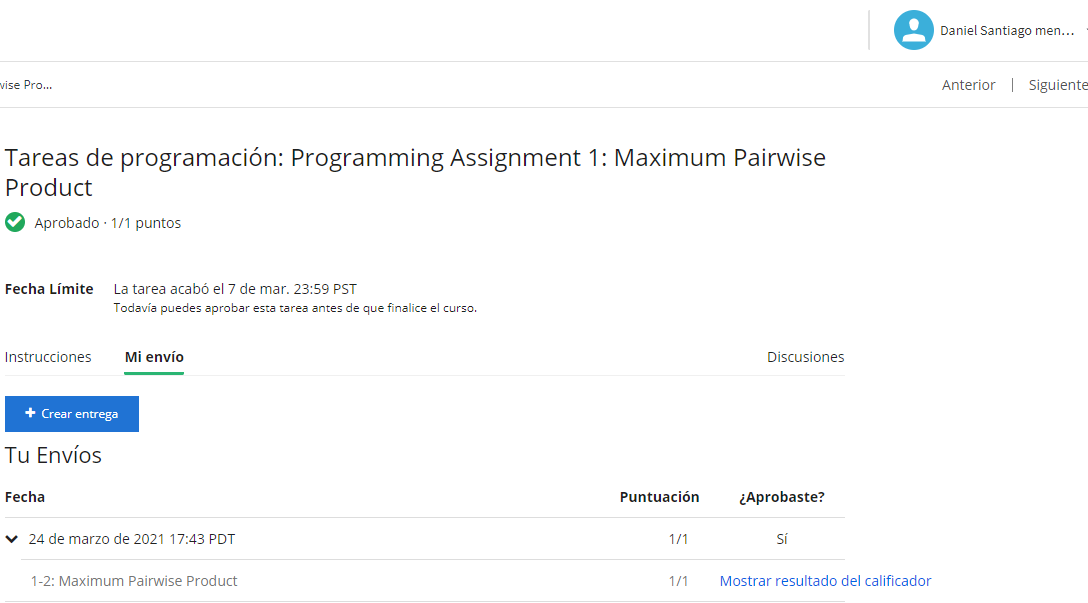